# Concatenate and plot netcdf files

In [1]:
import netCDF4 as nc
import numpy as np
from datetime import datetime, timedelta

import xarray as xr
from netCDF4 import Dataset
import netCDF4

# Add any possible locations of amr-wind-frontend here
amrwindfedirs = ['/projects/wind_uq/lcheung/amrwind-frontend/',
                 '/ccs/proj/cfd162/lcheung/amrwind-frontend/']
import sys, os, shutil, io
for x in amrwindfedirs: sys.path.insert(1, x)

%matplotlib inline

import postproamrwindsample_xarray as ppsample
import numpy as np
import matplotlib.pyplot as plt

In [21]:
ds_48000 = xr.open_dataset("/pscratch/mlblayl/AWAKEN/Benchmark/SNL_ARM-Wind_Inflow_48000.nc")
ds_68000 = xr.open_dataset("/pscratch/mlblayl/AWAKEN/Benchmark/SNL_ARM-Wind_Inflow_68000.nc")
#print(len(ds_48000['u_siteA1']))
#print(ds_68000['T_siteB'][0].values)

20285
[      nan 302.982   303.64407 304.39993 305.105   305.9482  306.7315
 307.47662 308.159   308.80148 309.22342 309.6756  310.09073 310.4267
 310.71725 310.94672 311.11798 311.24777 311.34082 311.4135  312.48923
 321.0256  321.49866 321.5     321.5           nan       nan       nan
       nan       nan       nan       nan       nan       nan       nan
       nan       nan       nan       nan       nan]


48000.nc goes from 24000 to 26028.4 (20285)
-2023-08-24 04:55:00 to 
2023-08-24 05:28:48.400000

68000.nc goes from 26000 to 27999 (19991)
-  2023-08-24 05:28:20  to   
   2023-08-24 06:01:39

In [23]:
start_time = datetime(2023, 8, 23, 22, 15)  #This is the start time of the AMR-Wind simulation
print(start_time)
print(ds_68000['time'][0].values)
#print(start_time+ timedelta(seconds=ds_48000['time'][0])) #This is the first time step to be saved in the simulation
print('Start 48000   ',start_time+ timedelta(seconds = 24000))
print('End   48000   ',start_time+ timedelta(seconds = 26028.4))
print('Start 68000   ',start_time+ timedelta(seconds = 26000))
print('End   68000   ',start_time+ timedelta(seconds = 27999))

2023-08-23 22:15:00
2023-08-24T05:28:20.000000000
Start 48000    2023-08-24 04:55:00
End   48000    2023-08-24 05:28:48.400000
Start 68000    2023-08-24 05:28:20
End   68000    2023-08-24 06:01:39


In [24]:
# Select the desired time range
start_date = "2023-08-24 04:55:00"
end_date = "2023-08-24 05:28:20"
subset_ds = ds_48000.sel(time=slice(start_date, end_date))

In [39]:
print(subset_ds['time'][0].values)
print(subset_ds['time'][-1].values)

2023-08-24T04:55:00.000000000
2023-08-24T05:28:20.000000000


In [26]:
all_times_ds = xr.concat([subset_ds,ds_68000], dim="time")

In [54]:
print(all_times_ds['time'][0].values)
print(all_times_ds['time'][-1])

2023-08-24T04:55:00.000000000
<xarray.DataArray 'time' ()>
array('2023-08-24T06:01:39.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2023-08-24T06:01:39


In [28]:
all_times_ds.to_netcdf("SNL_ARM-Wind_Inflow.nc")

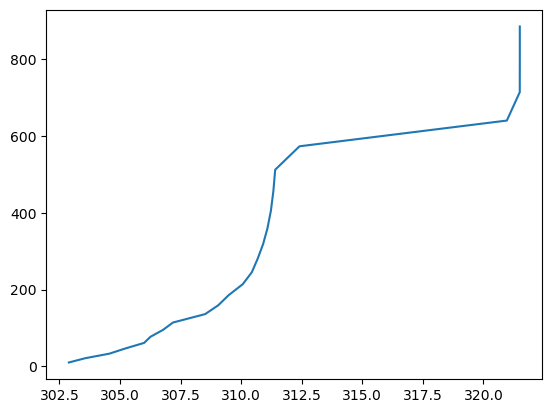

In [62]:
plt.plot(all_times_ds['T_siteB'][-1], all_times_ds['height_assist'])

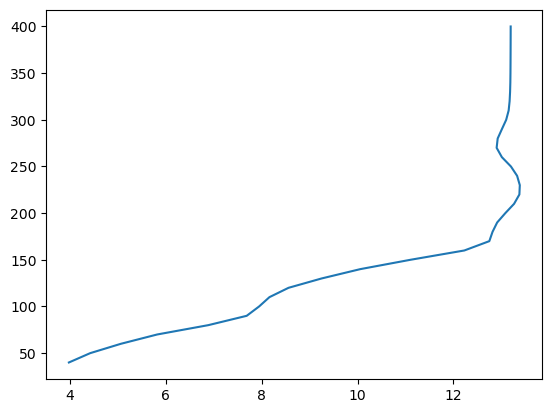

In [64]:
plt.plot(all_times_ds['WS_siteA2'][-1], all_times_ds['height_lidar'])

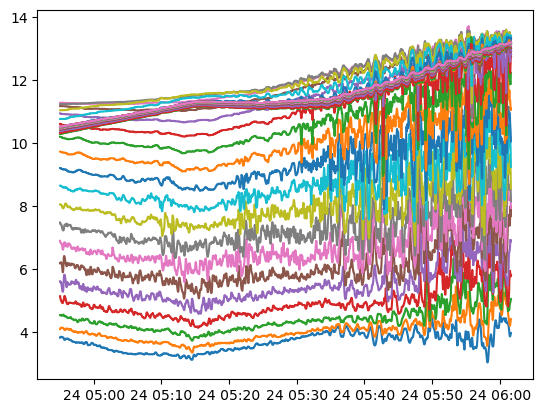

In [33]:
plt.plot(all_times_ds['time'],all_times_ds['WS_siteA2'])

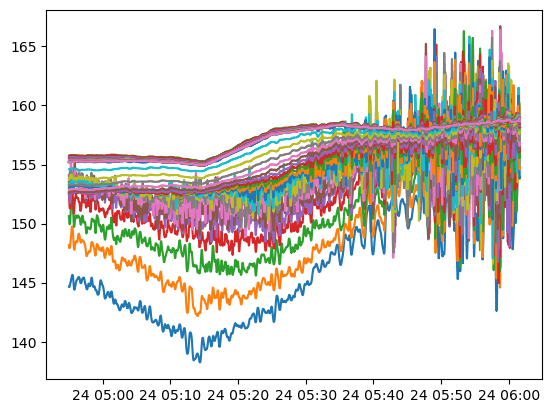

In [34]:
plt.plot(all_times_ds['time'],all_times_ds['WD_siteA2'])

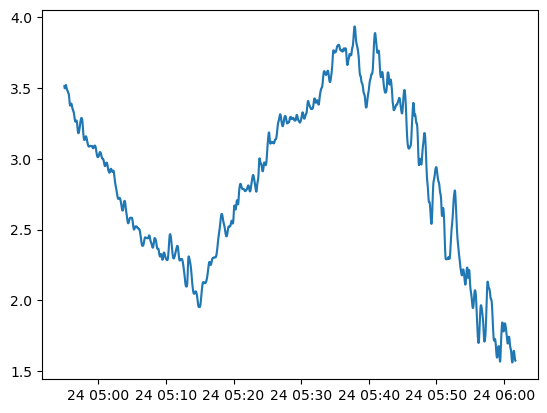

In [37]:
plt.plot(all_times_ds['time'],all_times_ds['WS_sfc_siteA1'])

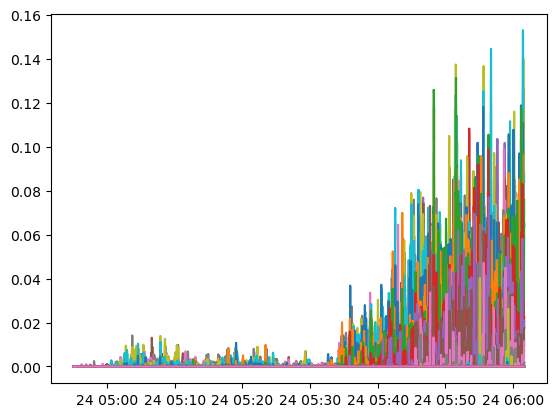

In [49]:
plt.plot(all_times_ds['time'],all_times_ds['TKE_siteA1'])

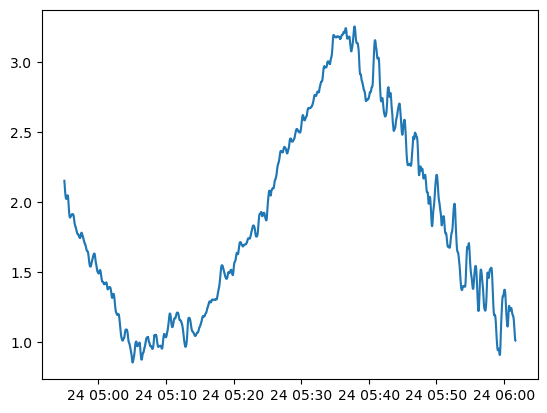

In [51]:
plt.plot(all_times_ds['time'],all_times_ds['v_sfc_siteA1'])